## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Dataset

In [2]:
df=pd.read_csv('datasets_830631_1419022_results (1).csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [4]:
df.shape

(4163, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 9 columns):
date          4163 non-null object
home_team     4163 non-null object
away_team     4163 non-null object
home_score    4163 non-null int64
away_score    4163 non-null int64
tournament    4163 non-null object
city          4163 non-null object
country       4163 non-null object
neutral       4163 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 264.4+ KB


In [6]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

The data is clean so we do not perform Data Cleaning.

## 3. Feature Engineering

We change the date time format.

In [7]:
type(df['date'].iloc[0])

str

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
type(df['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df['year']=df['date'].apply(lambda x: x.year)

In [11]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,1969
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,1969
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,1969
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,1969
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,1975


## 4. Exploratory Data Analysis

We want to find the 15 most successful teams that gained the highest scores in their home and the 15 most successful teams that gained the highest scores away from their home.

In [12]:
home=df.groupby('home_team').sum()['home_score'].sort_values(ascending=False).head(15)

In [13]:
away=df.groupby('away_team').sum()['away_score'].sort_values(ascending=False).head(15)

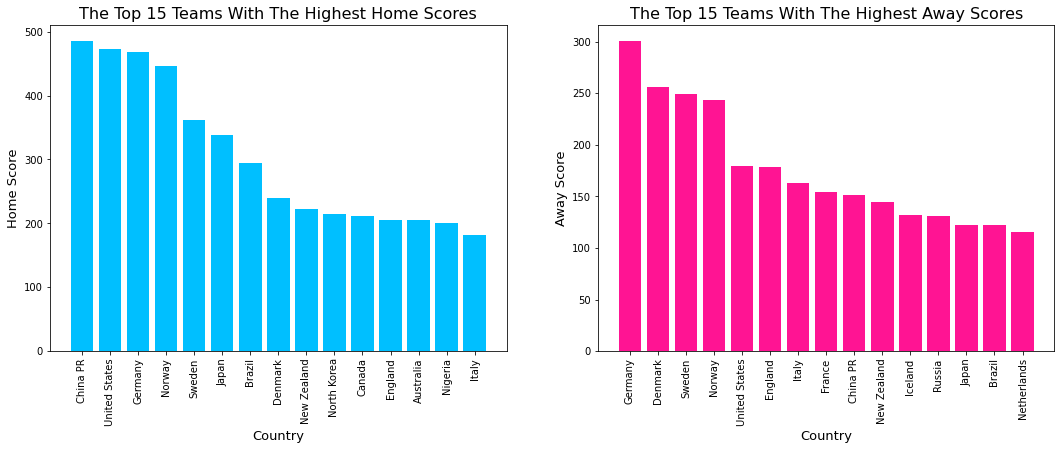

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(x=list(home.index), height=list(home.values),color='deepskyblue')
plt.xticks(rotation=90)
plt.xlabel('Country',  fontsize=13)
plt.ylabel('Home Score',  fontsize=13)
plt.title('The Top 15 Teams With The Highest Home Scores', fontsize=16)
plt.subplot(1,2,2)
plt.bar(x=list(away.index), height=list(away.values) ,color='deeppink')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Away Score',  fontsize=13)
plt.title('The Top 15 Teams With The Highest Away Scores', fontsize=16)
plt.show()

We can see that China PR has the highest home scores, and Germany has the highest away scores.

Now we want to find the best 5 teams of all time regarding both the scores obtained in their home and away from their home.

In [15]:
df_home_away=pd.DataFrame({'total_home_scores':home ,'total_away_scores':away})

In [16]:
df_home_away.isnull().sum()

total_home_scores    4
total_away_scores    4
dtype: int64

In [17]:
df_home_away.fillna(0, inplace=True)

In [18]:
df_home_away['total_scores']= df_home_away['total_home_scores'] + df_home_away['total_away_scores']

In [19]:
df_home_away_sorted=df_home_away.sort_values(by='total_scores', ascending=False).head(5)

In [20]:
df_home_away_sorted

,total_home_scores,total_away_scores,total_scores
Germany,468.0,301.0,769.0
Norway,446.0,243.0,689.0
United States,472.0,179.0,651.0
China PR,486.0,151.0,637.0
Sweden,362.0,249.0,611.0


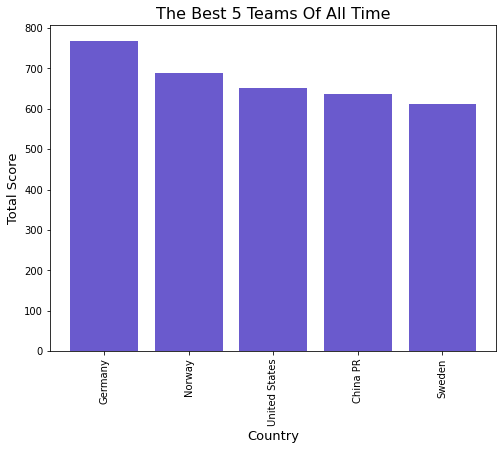

In [21]:
plt.figure(figsize=(8,6))
plt.bar(x=list(df_home_away_sorted.index), height=df_home_away_sorted['total_scores'],color='slateblue')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Total Score', fontsize=13)
plt.title('The Best 5 Teams Of All Time', fontsize=16)
plt.show()

We can see that Germany is the best team of all time.

We want to find out that in each year, what are the hisgest scores regarding both the scores obtained in  home and away from  home, and which countries obtained these scores in each year.

In [22]:
country=[]
total_score=[]

for x in df['year'].unique():
    home=df[df['year']==x].groupby('home_team').sum()['home_score']
    away=df[df['year']==x].groupby('away_team').sum()['away_score']
    new=pd.DataFrame({'home_team':home ,'away_team':away})
    new.fillna(0, inplace=True)
    new['total']= new['home_team'] + new['away_team']
    total_sorted=new['total'].sort_values(ascending=False).head(1)
    country=country+list(total_sorted.index)
    total_score=total_score+list(total_sorted)

In [23]:
df_year= pd.DataFrame({'country':country,'total_score':total_score,'year':df['year'].unique()})

In [24]:
df_year.head()

,country,total_score,year
0,England,5.0,1969
1,Australia,12.0,1975
2,Chinese Taipei,16.0,1977
3,Italy,9.0,1979
4,Chinese Taipei,19.0,1980


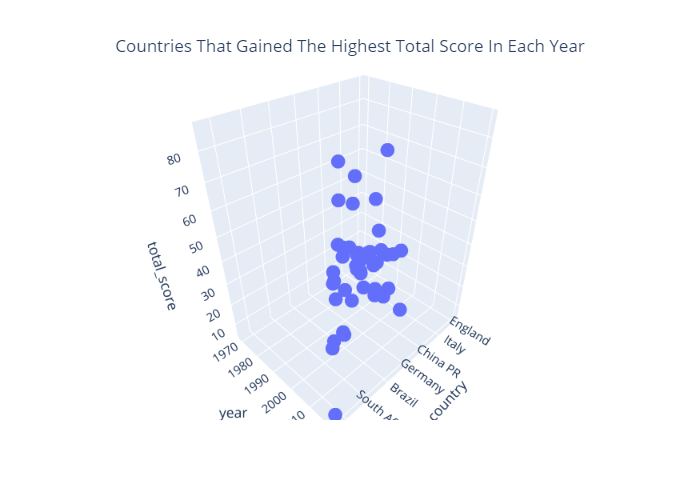

In [25]:
fig=px.scatter_3d(df_year,x='country', y='year',z='total_score')
fig.update_layout(
    title={
        'text': 'Countries That Gained The Highest Total Score In Each Year',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

In [26]:
df_year[df_year['total_score']==df_year['total_score'].max()]

,country,total_score,year
42,New Zealand,86.0,2018


We can see that the maximun total score was 86 and it was obtained by New zaland in 2018.

Let's find the number of tournaments conducted per year.

In [27]:
number=[]
for x in df['year'].unique():
    number.append(df[df['year']==x]['tournament'].nunique())

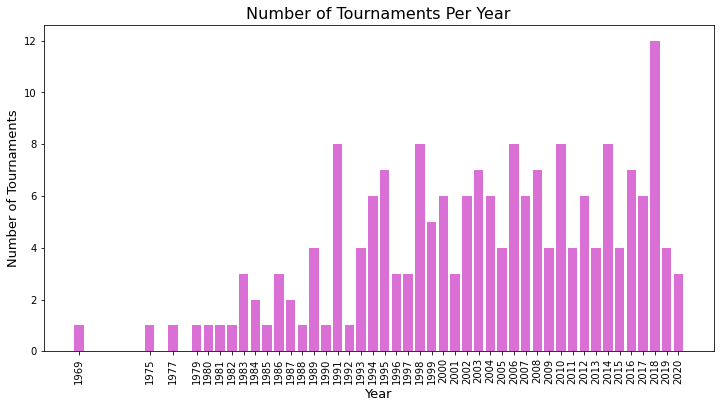

In [28]:
plt.figure(figsize=(12,6))
plt.bar(x=df['year'].unique(), height=number,color='orchid')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Tournaments', fontsize=13)
plt.xticks(ticks=df['year'].unique(),rotation=90)
plt.title('Number of Tournaments Per Year', fontsize=16)
plt.show()

We can see that the maximun number of tournements is 12 and it was obtained in year 2018.

Now we find the most popular Tournaments.

In [29]:
tournament=[]
for x in df['tournament'].unique():
    tournament.append(df[df['tournament']==x]['year'].nunique())

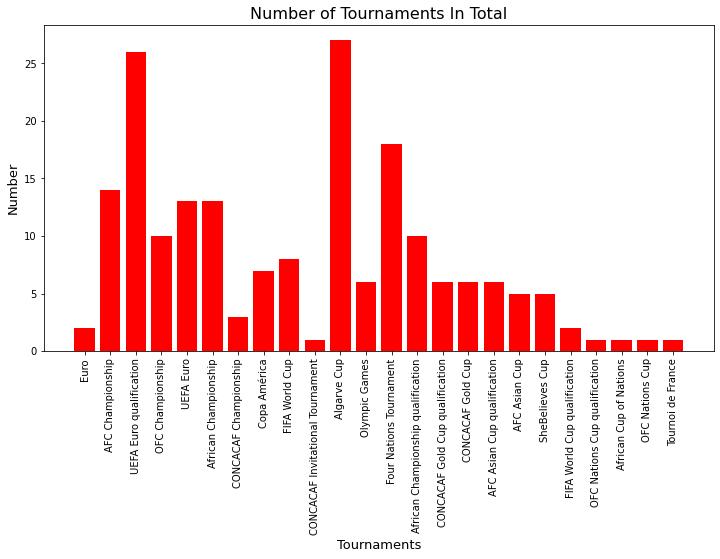

In [30]:
plt.figure(figsize=(12,6))
plt.bar(x=df['tournament'].unique(),height=tournament, color='r')
plt.xticks(rotation=90)
plt.title('Number of Tournaments In Total', fontsize=16)
plt.xlabel('Tournaments', fontsize=13)
plt.ylabel('Number', fontsize=13)
plt.show()

We observe that Algarve Cup is most popular and UEFA Euro qualification is the second most-popular tornament.

Let's visualize the distribuition of home scores and away scores.

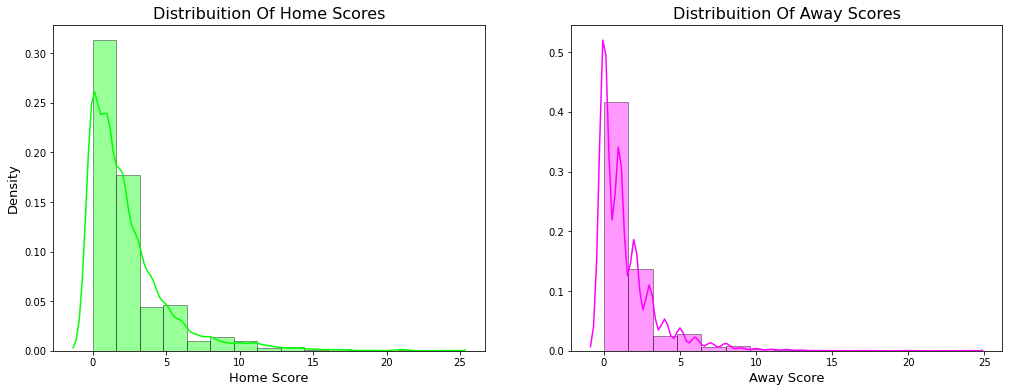

In [31]:
plt.figure(figsize=(17,6))


plt.subplot(1,2,1)
sns.distplot(df['home_score'],bins=15,color='lime',hist_kws=dict(edgecolor='black'))
plt.xlabel('Home Score', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Distribuition Of Home Scores', fontsize=16)

plt.subplot(1,2,2)
sns.distplot(df['away_score'],bins=15,color='magenta',hist_kws=dict(edgecolor='black'))
plt.xlabel('Away Score', fontsize=13)
plt.title('Distribuition Of Away Scores', fontsize=16)

plt.show()

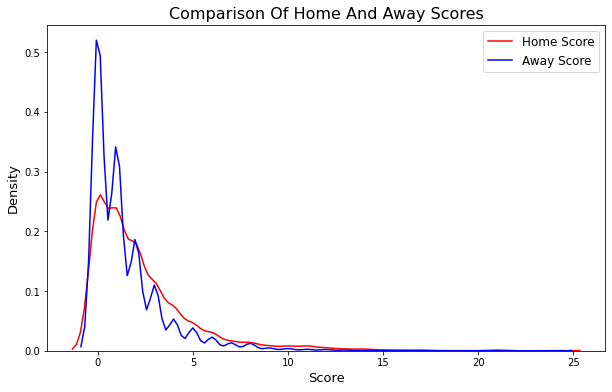

In [32]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['home_score'], color='r')
sns.kdeplot(df['away_score'], color='b')
plt.xlabel('Score', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(['Home Score', 'Away Score'], fontsize=12)
plt.title('Comparison Of Home And Away Scores', fontsize=16)
plt.show()

We can see that the away scores starts at much higher value as compared with the home scores.

Let's find the first 15 countries with the highest number of hosting.

In [33]:
number=[]
for x in df['country'].unique():
    number.append(df[df['country']==x]['year'].nunique())

In [34]:
df_country=pd.DataFrame({'Host Country':df['country'].unique(),'Number of Hosting':number}).sort_values(by='Number of Hosting',ascending=False).head(15)

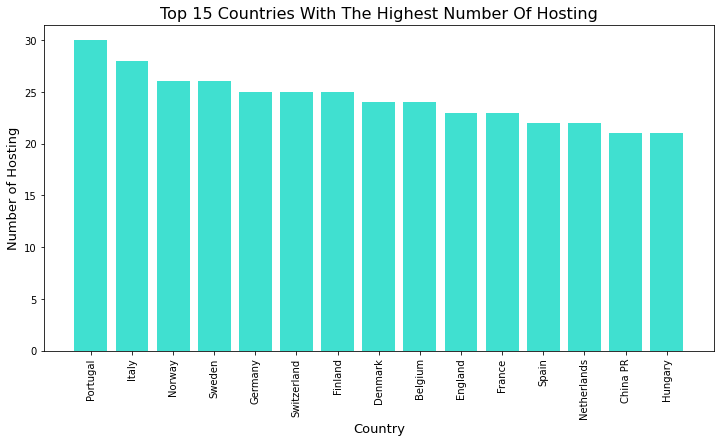

In [35]:
plt.figure(figsize=(12,6))
plt.bar(x=df_country['Host Country'], height=df_country['Number of Hosting'], color='turquoise')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Hosting', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 15 Countries With The Highest Number Of Hosting', fontsize=16)
plt.show()

We can see that Portugal hosted the highest number of games.

We find the countries that host the highest number of most matches where they themselves are not participating in.

In [36]:
only_host=[]
for x in df['country'].unique():
        df_con=df[df['country']==x]
        only_host.append(df_con[(df_con['home_team']!=x) & (df_con['away_team']!=x)]['date'].count())

In [37]:
df_host=pd.DataFrame({'Host Country':df['country'].unique(), 'Number of Only Hosting':only_host}).sort_values(by='Number of Only Hosting',ascending=False).head(15)

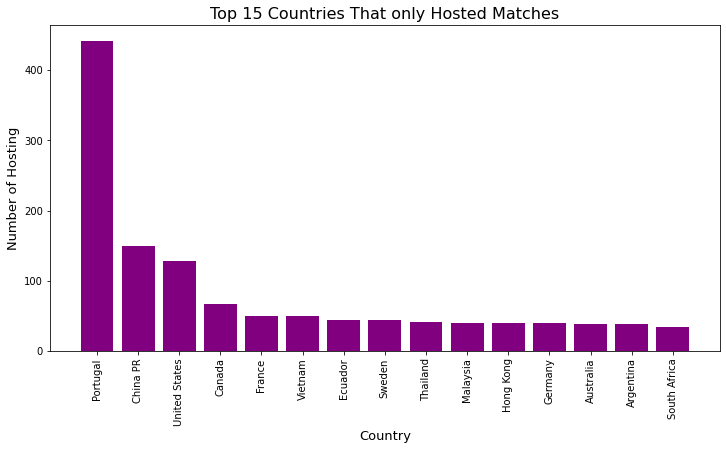

In [38]:
plt.figure(figsize=(12,6))
plt.bar(x=df_host['Host Country'], height=df_host['Number of Only Hosting'],color='purple')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Hosting', fontsize=13)
plt.xticks(rotation=90)
plt.title('Top 15 Countries That only Hosted Matches', fontsize=16)
plt.show()

We can see that Portugal hosted the highest number of games in which it did not played.

Let's explore how much, if at all, hosting a major tournament helps a country's chances in the tournament.

In [39]:
win=[]
lose=[]
equal=[]
for x in df['country'].unique():
    df_con=df[df['country']==x]
    df_home=df_con[df_con['home_team']==x]
    win.append(df_con[df_con['home_score']>df_con['away_score']]['date'].count())
    lose.append(df_con[df_con['home_score']<df_con['away_score']]['date'].count())
    equal.append(df_con[df_con['home_score']==df_con['away_score']]['date'].count())

In [40]:
df_chance=pd.DataFrame({'Host Country':df['country'].unique(), 'Number of Winning':win, 'Number of Loosing':lose, 'Number of Equal':equal})

In [41]:
df_merge=pd.merge(df_chance,df_country, on='Host Country').sort_values(by='Number of Hosting', ascending=False)

In [42]:
df_merge.head()

,Host Country,Number of Winning,Number of Loosing,Number of Equal,Number of Hosting
10,Portugal,269,223,88,30
0,Italy,53,10,13,28
2,Norway,47,6,9,26
5,Sweden,63,19,20,26
1,Finland,26,27,14,25


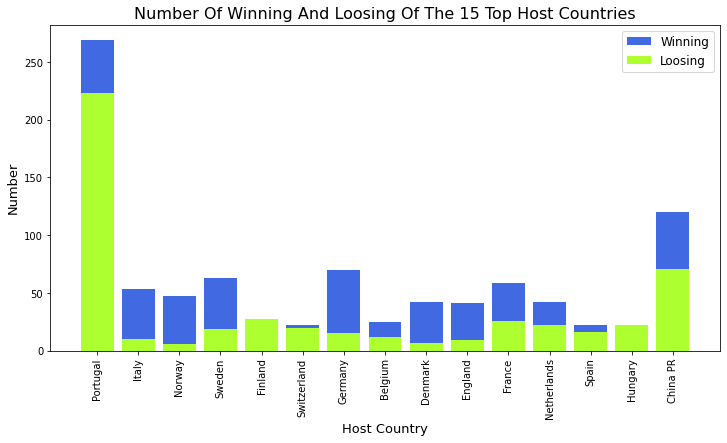

In [43]:
plt.figure(figsize=(12,6))
plt.bar(x=df_merge['Host Country'], height=df_merge['Number of Winning'], color='royalblue')
plt.bar(x=df_merge['Host Country'], height=df_merge['Number of Loosing'], color='greenyellow')
plt.legend(['Winning','Loosing'])
plt.xlabel('Host Country', fontsize=13)
plt.ylabel('Number', fontsize=13)
plt.xticks(rotation=90)
plt.legend(['Winning', 'Loosing'], fontsize=12)
plt.title('Number Of Winning And Loosing Of The 15 Top Host Countries', fontsize=16)
plt.show()

We see that except for Finland and Hungary, for other 15 host countries which hosted most of the matches, the number of winning was higher than the number of loosing. So we conclude that hosting can increase the chance of winning.

We create 3D Scatter plots of home teams and away teams versus their home scores and away scores in each year.

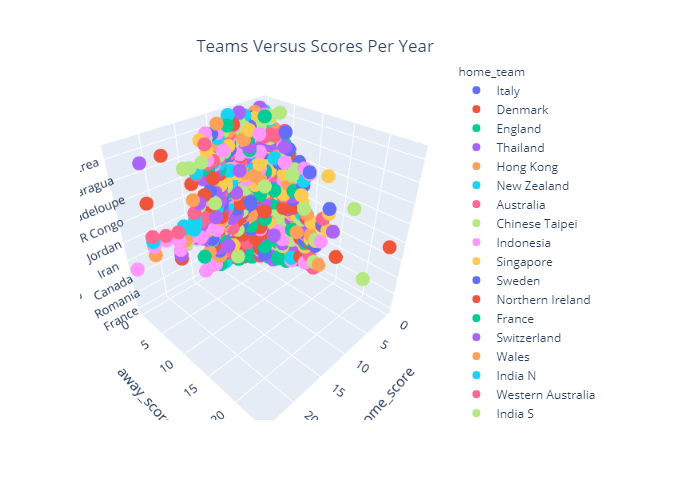

In [48]:
fig=px.scatter_3d(data_frame=df,x='home_score', y='away_score',z='away_team',color='home_team',hover_name='year')
fig.update_layout(
    title={
        'text': 'Teams Versus Scores Per Year',
        'y':0.92,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

## 5. Conclusion

In this notebook, we analyzed Women's International Football Results Dataset and analyzed:


- The 15 most successful teams that gained the highest home scores and away scores.

- The best 5 teams of all time regarding both home scores and away scores.

- Countries which gained the hisgest total scores in each year.

- The number of tournaments conducted per year.

- The most popular tournaments.

- The distribuition of home scores and away scores.

- The first 15 countries with the highest number of hosting.

- Countries which hosted most of the matches where they themselves did not participate in.

- Whether hosting a major tournament helped a country's chances in the tournament.